In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
pd.set_option('max_rows', 5)
%matplotlib inline

# ロジスティック回帰
---
2 値変数 ( 2 種類の値をとる) を目的変数として、対応するカテゴリにそのデータが属する確率を推定する手法の 1 つ。

<table class="border text-center background-bright">
    <tr class="background-dark">
        <th></th>
        <th>$x$</th>
        <th>正解</th>
        <th class="border-right-double">$y$</th>
        <th>$\hat{y}$</th>
        <th>Aである確率</th>
        <th>Bである確率</th>
        <th>予測</th>
    </tr>
    <tr>
        <td>1</td>
        <td class="text-right">1.1</td>
        <td>A</td>
        <td class="border-right-double">1</td>
        <td>0.98</td>
        <td class="text-right">98%</td>
        <td class="text-right">2%</td>
        <td>A</td>
    </tr>
    <tr>
        <td>2</td>
        <td class="text-right">0.5</td>
        <td>B</td>
        <td class="border-right-double">0</td>
        <td>0.55</td>
        <td class="text-right">55%</td>
        <td class="text-right">45%</td>
        <td>A</td>
    </tr>
    <tr>
        <td colspan="8">$\vdots$</td>
    </tr>
    <tr>
        <td>n</td>
        <td class="text-right">-2.5</td>
        <td>B</td>
        <td class="border-right-double">0</td>
        <td>0.04</td>
        <td class="text-right">4%</td>
        <td class="text-right">96%</td>
        <td>B</td>
    </tr>
</table>



## ダミー変数
---
カテゴリ変数 (主に名義尺度) を 0 または 1 の値をとる 2 値変数に変換して数値計算可能にする手法。  
One-hot エンコーディングとも呼ぶ。

<table class="background-bright border text-center">
    <tr>
        <th class="background-default border-top-none border-left-none border-bottom" rowspan="2"></th>
        <th class="background-dark">カテゴリ変数</th>
        <td class="background-default border-top-none border-bottom-none" rowspan="2"></td>
        <th class="background-dark" colspan="3">ダミー変数</th>
    </tr>
    <tr class="background-dark border-bottom">
        <th>色</th>
        <th>赤</th>
        <th>緑</th>
        <th>青</th>
    </tr>
    <tr>
        <td>1</td>
        <td>赤</td>
        <td class="background-default border-top-none border-bottom-none" rowspan="3">→</td>
        <td>1</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td>2</td>
        <td>緑</td>
        <td>0</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>3</td>
        <td>青</td>
        <td>0</td>
        <td>0</td>
        <td>1</td>
    </tr>
</table>

ダミー変数は 1 列削っても情報は失われない (その他の変数から削除された列の値がわかる) ので、特にカテゴリの水準 (カテゴリ数) が 2 つしかない場合には 1 列だけで表現することが多い。

<table class="background-bright border text-center">
    <tr>
        <th class="background-default border-top-none border-left-none border-bottom" rowspan="2"></th>
        <th class="background-dark">カテゴリ変数</th>
        <th class="background-default border-top-none border-bottom-none" rowspan="2"></th>
        <th class="background-dark" colspan="2">ダミー変数</th>
    </tr>
    <tr class="background-dark border-bottom">
        <th>性別</th>
        <th>男</th>
    </tr>
    <tr>
        <td>1</td>
        <td>男</td>
        <td class="background-default border-top-none border-bottom-none" rowspan="2">→</td>
        <td>1</td>
    </tr>
    <tr>
        <td>2</td>
        <td>女</td>
        <td>0</td>
    </tr>
</table>

ダミー変数を用いずに各カテゴリに $1,\ 2,\ 3,\ \cdots $ のような数値を割り振ると、カテゴリ間に順序が生じてしまうので行ってはいけない。  
例えば、名義尺度の変数に赤 = 1 ・緑 = 2 ・青 = 3 のように割り振ると、赤 < 緑 < 青という順序尺度の変数になってしまう。

## 確率の推定方法
---
回帰分析を利用すると、データから実数値 $(-\infty \sim \infty)$ を推定できるので、実数値→確率 $(0\sim 1)$ に変換できると便利。そこで、累積分布関数を使って実数を確率に変換することが考えられる。  
その分布 (累積分布関数) にロジスティック分布 (ロジスティック関数) を使うのがロジスティック回帰。

$\displaystyle ロジスティック関数\ f( x) =\frac{e^{x}}{1+e^{x}} =\frac{1}{1+e^{-x}}$

練習問題

---
ロジスティック分布の累積分布関数のグラフを表示する。

解答例

---

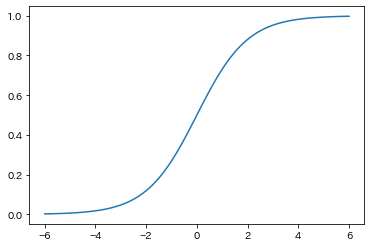

In [2]:
x = np.linspace(-6, 6, 100)
y = 1 / (1 + np.exp(-x))
plt.plot(x, y)
plt.show()

---

ロジスティック分布は正規分布に似ているが、正規分布より計算しやすいのが特徴。

練習問題

---
ロジスティック分布の確率密度関数のグラフを表示する。確率密度関数 $f'( x)$ は累積分布関数を $f( x)$ とすると、以下で表される。

$\displaystyle f'( x) =f( x) \times ( 1-f( x))$

解答例

---

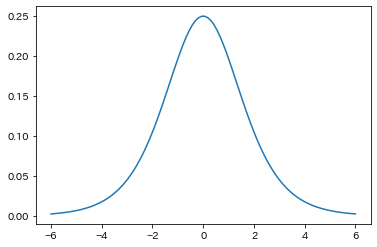

In [3]:
x = np.linspace(-6, 6, 100)
f = lambda x: 1 / (1 + np.exp(-x))
plt.plot(x, f(x) * (1 - f(x)))
plt.show()

---

## Pythonでのロジスティック回帰の実行
---
`sklearn.linear_model.LogisticRegression`を用いる。 scikit-learn の実装は厳密には上の説明と異なるが、引数`C` $\rightarrow \infty $ または`penalty='none'`で両者は一致する。

In [4]:
x, y = make_classification(n_features=1,
                           n_informative=1,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=1234)
clf = pd.DataFrame(dict(x=x.ravel(), y=y))
print('clf')
display(clf)

clf


,x,y
0,-0.158174,0
1,-2.460149,0
...,...,...
98,-1.377130,0
99,-0.998298,0


In [5]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [6]:
# 最初にインスタンスを作成
model = LogisticRegression()
# fitメソッドで分布関数を求める
# xはサイズが(サンプルサイズ × 変数の数)の行列でなければならない
x = clf['x'].values.reshape((-1, 1))
y = clf['y']
model.fit(x, y)
# 予測した確率はpredict_probaで得られる
# 予測結果は[クラス0の確率, クラス1の確率]の配列
print('予測結果')
print(model.predict_proba(x))
# クラス1の確率のみ得るには列を取り出す
print('クラス1の確率')
print(model.predict_proba(x)[:, 1])

予測結果
[[6.80826448e-01 3.19173552e-01]
 [9.99276492e-01 7.23508072e-04]
 [9.29576032e-02 9.07042397e-01]
 [2.41281211e-02 9.75871879e-01]
 [9.89678083e-01 1.03219170e-02]
 [9.72951037e-01 2.70489632e-02]
 [8.18492711e-02 9.18150729e-01]
 [8.28677148e-02 9.17132285e-01]
 [7.27575544e-02 9.27242446e-01]
 [4.28093735e-02 9.57190626e-01]
 [9.94245826e-01 5.75417412e-03]
 [9.99595947e-01 4.04052619e-04]
 [3.08385282e-02 9.69161472e-01]
 [1.94138713e-01 8.05861287e-01]
 [9.36296781e-01 6.37032189e-02]
 [1.39429704e-01 8.60570296e-01]
 [5.65848345e-02 9.43415165e-01]
 [9.71764567e-01 2.82354332e-02]
 [7.70810248e-03 9.92291898e-01]
 [9.01016652e-01 9.89833485e-02]
 [9.13904284e-01 8.60957159e-02]
 [1.60480825e-02 9.83951917e-01]
 [6.03531011e-02 9.39646899e-01]
 [7.91296233e-03 9.92087038e-01]
 [2.13268662e-01 7.86731338e-01]
 [9.90117437e-01 9.88256305e-03]
 [9.50385358e-01 4.96146417e-02]
 [9.56449203e-01 4.35507969e-02]
 [9.99543819e-01 4.56180904e-04]
 [7.07502363e-01 2.92497637e-01]
 [9.7

練習問題

---
clfデータセットの散布図とclfデータセットから学習したロジスティック回帰の予測曲線 (累積分布関数) を表示する。

解答例

---

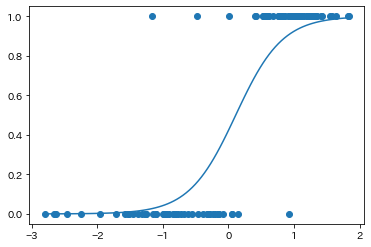

In [7]:
x = clf['x'].values.reshape((-1, 1))
y = clf['y']
model = LogisticRegression()
model.fit(x, y)
xx = np.linspace(x.min(), x.max(), 100).reshape((-1, 1))
plt.scatter(x, y)
plt.plot(xx, model.predict_proba(xx)[:, 1])
plt.show()

---

## 推薦図書
---
- [見て試してわかる機械学習アルゴリズムの仕組み 機械学習図鑑](https://www.amazon.co.jp/%E8%A6%8B%E3%81%A6%E8%A9%A6%E3%81%97%E3%81%A6%E3%82%8F%E3%81%8B%E3%82%8B%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%82%A2%E3%83%AB%E3%82%B4%E3%83%AA%E3%82%BA%E3%83%A0%E3%81%AE%E4%BB%95%E7%B5%84%E3%81%BF-%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E5%9B%B3%E9%91%91-%E7%A7%8B%E5%BA%AD-%E4%BC%B8%E4%B9%9F-ebook/dp/B07KPSJKH8/)
- [Python機械学習プログラミング 達人データサイエンティストによる理論と実践](https://www.amazon.co.jp/Python-%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0-%E9%81%94%E4%BA%BA%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B5%E3%82%A4%E3%82%A8%E3%83%B3%E3%83%86%E3%82%A3%E3%82%B9%E3%83%88%E3%81%AB%E3%82%88%E3%82%8B%E7%90%86%E8%AB%96%E3%81%A8%E5%AE%9F%E8%B7%B5-impress-gear/dp/4295003379/)